To dos:

- Update the new TK03 code using the previous code to calculate the TK03 vectors using the crater position in the varying models.
- Improve the color scheme of the figure.



Hi Jérôme,

I am now back from my fieldwork in Mongolia and Minnesota and have had time to take a look at these data and conduct some data analysis. I am attaching the data analysis I have done as an .html document which has all of the associated Python code. I have a few points to make at present and a few questions.

Point about the dike directions: I think that it is very possible that the diabase dike directions are not related to the impact. Clearly the breccia dike direction is impact related and is a full TRM. The charecteristic remanence in the sedimentary rocks is removed at relative low temperature and corresponds closely to this direction. Therefore it is likely a TVRM from the time of the impact event. However, as discussed in the manuscript, the dike direction appears to be distinct from these other directions. The remanence is held by magnetite which unblocks close to the stoichiometric magnetite unblocking temperature. That the remenance is held by magnetite makes it unlikely that the direction corresponds to some later (e.g. hydrothermal) event and it is quite unlikely that temperatures were reached in the crater that resulted in remagnetization up to 580ºC---to me this would be a surprising result. Very little remanence unblocks in the 200ºC to 350ºC range within the dikes such that an impact overprint would not be well recorded. Therefore, I think it is likely that the direction is a primary TRM dating to the time of the emplacement of the dikes with the Franklin LIP. To explore this possibility, I plotted up the Tunnunik VGPs (in tilt-correction coordinates and opposite polarity) with some Franklin LIP poles (the Franklin LIP is of dual polarity). As you will see, the VGPs are pretty close to the pole—well within what would be expected to arise through secular variation.

Inline image 1
Point about the Tunnunik mean pole: I don't think it makes sense to calculate the pole as a mean of lithology-type means. I think it would be better to treat each site as a VGP and calculate the mean of them. Excluding the dike directions and using each pole gives this pole which I use in the analysis below:

Plon: 351.4  Plat: 3.4
Number of directions in mean (n): 8
Angular radius of 95% confidence (A_95): 9.7
Precision parameter (k) estimate: 33.5
Inline image 1
Analysis of likelihood of pole arising from secular variation from 500 Ma to the present:
The approach I took for this analysis was to use either the Torsvik and Cock (2017) paleogeographic model or the Swanson-Hysell and Macdonald (2017) modification of it and use secular variation models to predict what the likelihood of the Tunnunik VGP arising from secular variation from the geographic poles predicted by those models. For example, at 400 Ma the Tunnunik VGP is 62.6º from the pole. Considering the 9.7º A95 uncertainty, the Tunnunik VGP is between 52.9º and 72.3º from the pole. To assess the likelihood of such an angular deviation from the pole arising through secular variation,, I took draws from the TK03 secular variation model and determined what percentage of the draws from the model where within that range of angular difference (I also did it from a Fisher distribution with a kappa of 20 with similar results as can be seen in the .html attachment). The result is this figure (which is below as an inline graphic and attached as a PDF), which I think could be a nice figure to include in the manuscript. 
Inline image 2
The result is that the Tunnunik VGP direction is much more likely to arise during the Ordovician than at later times. Given the evidence for effected Ordovician sedimentary rocks, I think that the conclusion could be that the impact likely occurred in the late Ordovician soon after those sediments were deposited. The presentation of the biostratigraphic constraints is rather vague in the literature, but they do seem indicative of an Ordovician (rather than Cambrian) age at the very least.

A question/request about the data:
- Strike and dip information is missing for some of the sites that nevertheless have tilt-corrected data. Could you send along an updated spreadsheet that contains these data? I would like to conduct a bootstrap fold test for which the bedding orientations are needed.
-Sample level data. I think it would make sense to conduct such a fold-test using the sample level results from the sedimentary units. Might you be able to send those along as well?

Let me know if the above is clear and what you think about this analysis approach and results.

Nick

On Fri, Sep 29, 2017 at 3:00 AM Jerome Gattacceca <gattacceca@cerege.fr> wrote:
Hello Nick,
Here is an updated draft for the Tunnunik paper.

I have included the results from our discussion about the likelihood of having the VGP for a pole of a given age etc. This may need some rephrasing to be fully understandable in English. We are OK on the length side for GRL so you may add to ~200 words if you wish.

I propose to keep different approaches: with your paleographic model and with Torsvick et al 2012 APWP, and also with both your and our statistical approach. All this to show that whatever you do, the age has to be old. I will send you our numbers for figure 5d so that everything can be plot in a coherent and homogeneous way.

You will also see that I have added very cool results from site TUN32 where the Shaler specimens adjacent to the dyke (only 4 samples unfortunately) kind of combine the fold, baked contact and reversal test !

We have computed a slightly different direction for one of the dykes (see updated table) so your figure S1 needs to be updated.

Osinski et al. are still discussing the stratigraphic ages, including with some other colleagues from the Canadian Geological Survey. But on the pmag side I think we are pretty much done so you can use this version to finalize this part on your side.

Cheers,

Jérôme

On Tue, Oct 10, 2017 at 12:53 AM, Jerome Gattacceca <gattacceca@cerege.fr> wrote:
Hi Nick,
Sorry I forgot to send you our results and code for the PSV model for Tunnunik.
Here they are:
- code (for the normalizing value, I used the same with the impact VGP replaced by the north pole)
- Excel file with the results

As you can see, the normalization has very limited effect. So I wonder if it is worth being included.
Maybe a log scale is better for the probability.
If we set 1% as the minimum likelihood, we can afford an age as young as 450 Myr.

Tell me if you feel the code is OK.

Cheers,

Jérôme

# Tunnunik crater data analysis

## Import Python packages

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Tunnunik site data

In [3]:
Tunnunik_sites = pd.read_csv('../Data/Tunnunik_sites.csv')
Tunnunik_sites['Dip_direction'] = Tunnunik_sites['Strike'] + 90
Tunnunik_sites_no_diabase = Tunnunik_sites[Tunnunik_sites.Unit != 'Diabase']  
Tunnunik_sites_diabase = Tunnunik_sites[Tunnunik_sites.Unit == 'Diabase']  
Tunnunik_sites_diabase

Unit Site name  site_lat  site_lon  N/n  dec_is  inc_is    k   _95   \
8   Diabase     TUN30   72.4729 -113.9320  6/6    98.4   -32.7  10.8  21.3   
9   Diabase     TUN32   72.4827 -113.9410  5/6   110.0   -35.9  48.0  11.2   
10  Diabase   TUN32#a   72.4827 -113.9410  3/4    63.1    -3.7  44.2  18.8   
11  Diabase   TUN32#b   72.4827 -113.9410  3/4   304.7    55.8  54.5  16.9   
12  Diabase   TUN32#c   72.4827 -113.9410  4/4   112.1   -58.4  66.8  11.3   
13  Diabase     TUN35   72.4839 -113.9379  8/8   102.3   -29.6  18.5  13.2   

    dec_tc  inc_tc  k .1   a95  Strike  Dip  NRM (10-6 Am2/kg)  \
8     98.1    23.2  10.8  21.3     184   56             275.00   
9    110.2    33.7  48.0  11.2     207   70             187.00   
10    44.2    32.4  44.2  18.8     207   70               2.96   
11   301.4   -13.9  54.5  16.9     207   70               2.96   
12   114.4    11.5  66.8  11.3     207   70               2.96   
13   101.5    32.8  18.5  13.2     213   66             272.00   

    _ (10-9 m3/kg)  Dip_direction  
8          11372.0            274  
9           9302.0            297  
10             2.3            297  
11             2.3            297  
12             2.3            297  
13         16215.0            303

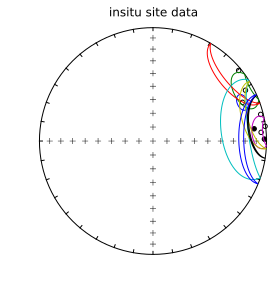

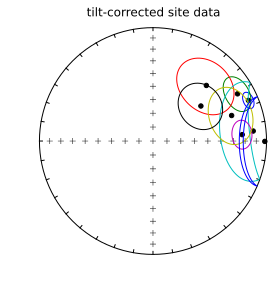

In [4]:
fignum = 1
plt.figure(num=fignum,figsize=(4,4),dpi=160)
ipmag.plot_net(fignum)
plt.title('insitu site data')

for index in Tunnunik_sites_no_diabase.index:
    ipmag.plot_di_mean(Tunnunik_sites_no_diabase.dec_is[index],
                       Tunnunik_sites_no_diabase.inc_is[index],
                       Tunnunik_sites_no_diabase.a95[index],color='k')
    
fignum = 2
plt.figure(num=fignum,figsize=(4,4),dpi=160)
ipmag.plot_net(fignum)
plt.title('tilt-corrected site data')

for index in Tunnunik_sites_no_diabase.index:
    ipmag.plot_di_mean(Tunnunik_sites_no_diabase.dec_tc[index],
                       Tunnunik_sites_no_diabase.inc_tc[index],
                       Tunnunik_sites_no_diabase.a95[index],color='k')

## Fold test on breccia + host rock directions

doing  100  iterations...please be patient.....


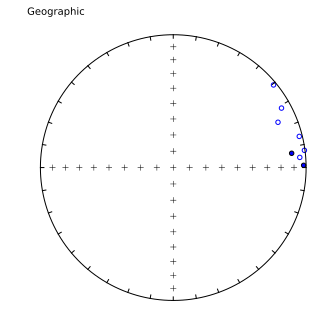

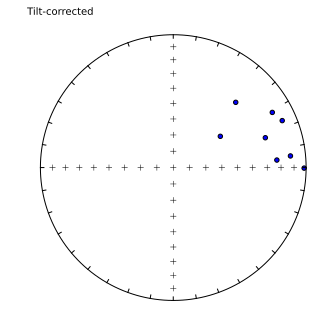


tightest grouping of vectors obtained at (95% confidence bounds):
-10 - 47 percent unfolding
range of all bootstrap samples: 
-10  -  78 percent unfolding


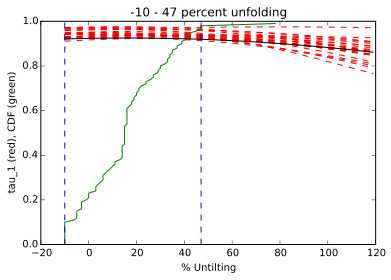

In [5]:
dec = Tunnunik_sites_no_diabase.dec_is.tolist()
inc = Tunnunik_sites_no_diabase.inc_is.tolist()
dip_direction = Tunnunik_sites_no_diabase.Dip_direction.tolist()
dip = Tunnunik_sites_no_diabase.Dip.tolist()
fold_test_array = ipmag.make_diddd_array(dec, inc, dip_direction, dip)
ipmag.bootstrap_fold_test(fold_test_array,num_sims=100)

doing  100  iterations...please be patient.....


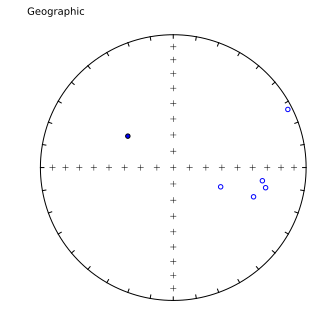

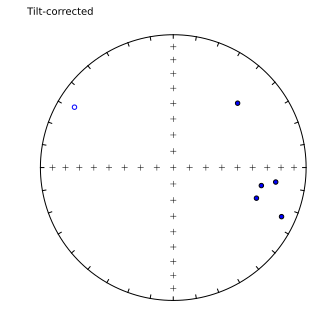


tightest grouping of vectors obtained at (95% confidence bounds):
-10 - 119 percent unfolding
range of all bootstrap samples: 
-10  -  119 percent unfolding


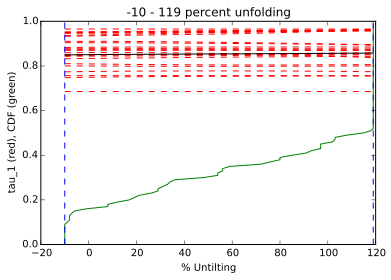

In [6]:
dec = Tunnunik_sites_diabase.dec_is.tolist()
inc = Tunnunik_sites_diabase.inc_is.tolist()
dip_direction = Tunnunik_sites_diabase.Dip_direction.tolist()
dip = Tunnunik_sites_diabase.Dip.tolist()
fold_test_array = ipmag.make_diddd_array(dec, inc, dip_direction, dip)
ipmag.bootstrap_fold_test(fold_test_array,num_sims=100)

## Tunnunik pole

To develop an impact virtual geomagnetic pole we will use the directions from the breccia dikes and the sedimentary units. As can be seen in the plots below, the direction from the dikes which is isolated at relatively high temperatures is close to other directions developed from the Franklin large igneous provinces.

In [7]:
ipmag.vgp_calc(Tunnunik_sites_no_diabase, tilt_correction='no')
ipmag.vgp_calc(Tunnunik_sites_diabase, tilt_correction='no')

In [8]:
impact_vgp_lon = Tunnunik_sites_no_diabase.vgp_lon.tolist()
impact_vgp_lat = Tunnunik_sites_no_diabase.vgp_lat.tolist()
impact_mean_pole = ipmag.fisher_mean(impact_vgp_lon,impact_vgp_lat)
ipmag.print_pole_mean(impact_mean_pole)

Plon: 351.4  Plat: 3.4
Number of directions in mean (n): 8
Angular radius of 95% confidence (A_95): 9.7
Precision parameter (k) estimate: 33.5


In [9]:
Tunnunik_breccia = Tunnunik_sites_no_diabase[Tunnunik_sites_no_diabase.Unit == 'Breccia']
Tunnunik_Victoria = Tunnunik_sites_no_diabase[Tunnunik_sites_no_diabase.Unit == 'Victoria']
Tunnunik_Shaler = Tunnunik_sites_no_diabase[Tunnunik_sites_no_diabase.Unit == 'Shaler']

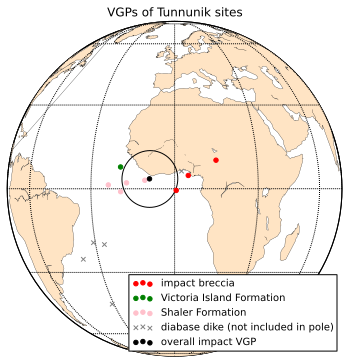

In [10]:
from mpl_toolkits.basemap import Basemap
mapname = Basemap(projection='ortho',lat_0=0,lon_0=0)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_breccia.vgp_lon.tolist(),
               vgp_lat=Tunnunik_breccia.vgp_lat.tolist(),
               color='red',label='impact breccia')
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_Victoria.vgp_lon.tolist(),
               vgp_lat=Tunnunik_Victoria.vgp_lat.tolist(),
               color='green',label='Victoria Island Formation')
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_Shaler.vgp_lon.tolist(),
               vgp_lat=Tunnunik_Shaler.vgp_lat.tolist(),
               color='pink',label='Shaler Formation')
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_sites_diabase.vgp_lon.tolist(),
               vgp_lat=Tunnunik_sites_diabase.vgp_lat.tolist(),
               color='grey',label='diabase dike (not included in pole)',marker='x')
ipmag.plot_pole(mapname,impact_mean_pole['dec'],impact_mean_pole['inc'],impact_mean_pole['alpha95'],label='overall impact VGP')
plt.title('VGPs of Tunnunik sites')
plt.legend(loc=4,fontsize=10)
plt.savefig('Tunnunik_VGP.png')
plt.show()

In [11]:
ipmag.vgp_calc(Tunnunik_sites_diabase)

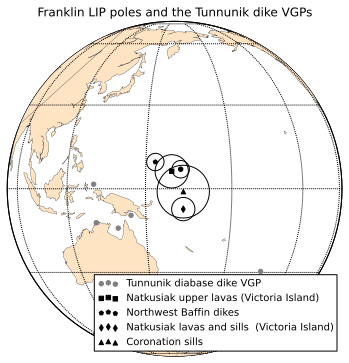

In [12]:
from mpl_toolkits.basemap import Basemap
mapname = Basemap(projection='ortho',lat_0=0,lon_0=160)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon = Tunnunik_sites_diabase.vgp_lon_rev.tolist(),
               vgp_lat=Tunnunik_sites_diabase.vgp_lat_rev.tolist(),
               color='grey',label='Tunnunik diabase dike VGP')
ipmag.plot_pole(mapname,plon=162.1,plat=6.7,A95=3.0)
ipmag.plot_pole(mapname,plon=159,plat=6,A95=5.7,
                marker='s', label='Natkusiak upper lavas (Victoria Island)')
ipmag.plot_pole(mapname,plon=153.3,plat=9.2,A95=3.0,
                marker='p',label='Northwest Baffin dikes')
ipmag.plot_pole(mapname,plon=163,plat=-7,A95=4,
                marker='d',label='Natkusiak lavas and sills  (Victoria Island)')
ipmag.plot_pole(mapname,plon=163,plat=-1,A95=9,
                marker='^',label='Coronation sills')
plt.legend(loc=4,fontsize=10)
plt.title('Franklin LIP poles and the Tunnunik dike VGPs')
plt.savefig('Franklin_LIP.png')
plt.show()

## Paleogeography and secular variation analysis

GPlates was used to calculate the position of the Tunnunik pole through time predicted by the Torsvik and Cocks (2017) paleogeographic model and the Swanson-Hysell and Macdonald (2017) modification of it. The angle of this position relative to the geographic pole can be calculated.

In [21]:
Tunnunik_pole_SH2017 = pd.read_csv('../Data/Tunnunik_pole_SH2017.csv')
Tunnunik_pole_TC2017 = pd.read_csv('../Data/Tunnunik_pole_TC2017.csv')
Laurentia_APWP_T2012 = pd.read_csv('../Data/Laurentia_Mean_APWP.csv')

In [22]:
time_SH2017 = []
angle_SH2017 = []

for n in range(0,len(Tunnunik_pole_SH2017)):
    time_SH2017.append(-Tunnunik_pole_SH2017['Time (Ma)'][n])
    pole_recon = (Tunnunik_pole_SH2017['Lon'][n],Tunnunik_pole_SH2017['Lat'][n])
    angle = pmag.angle(pole_recon,(0,-90))
    angle_SH2017.append(angle[0])

In [23]:
time_TC2017 = []
angle_TC2017 = []

for n in range(0,len(Tunnunik_pole_TC2017)):
    time_TC2017.append(-Tunnunik_pole_TC2017['Time (Ma)'][n])
    pole_recon = (Tunnunik_pole_TC2017['Lon'][n],Tunnunik_pole_TC2017['Lat'][n])
    angle = pmag.angle(pole_recon,(0,-90))
    angle_TC2017.append(angle[0])

In [24]:
time_T2012 = []
angle_T2012 = []

for n in range(0,len(Laurentia_APWP_T2012)):
    time_T2012.append(-Laurentia_APWP_T2012['Age'][n])
    Laurentia_pole = (Laurentia_APWP_T2012['Plon.1'][n],Laurentia_APWP_T2012['Plat.1'][n])
    angle = pmag.angle(Laurentia_pole,(351.4,3.4))
    angle_T2012.append(angle[0])

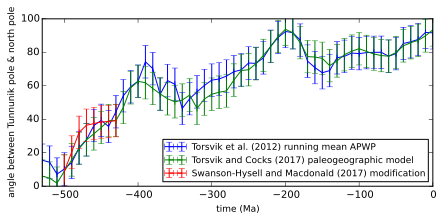

In [58]:
plt.figure(figsize=(7,3))
plt.errorbar(time_T2012, angle_T2012, xerr=0, yerr=9.7,label='Torsvik et al. (2012) running mean APWP')
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[3:11], angle_SH2017[3:11], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) modification')
plt.ylim(0,100)
plt.xlim(-530,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=9)
plt.xlabel('time (Ma)',fontsize=9)
plt.legend(loc=4,fontsize=9)
plt.show()

### Secular variation represented by a Fisher distribution

The chance of such an angular deviation from the geographic pole arising through secular variation can be determined through comparison to secular variation models. Two approaches are taken below. The first is to model secular variation as coming from a Fisher distribution with a kappa of 20. The second is to model secular variation using the TK03 model. As the angle between the impact virtual geomagnetic pole and the position of geographic north implied by the models and the running mean APWP gets larger the chance of the VGP position having arisen through secular variation of the geomagnetic field becomes lower. To evaluate the chance that 


The percentage of simulated draws coming from those models that are within the angle and A95 uncertainty bounds at each time step can then be calculated and used to assess the likelihood that the crater is a given age.

In [27]:
fishrot_lon,fishrot_lat = ipmag.fishrot(k=20, n=100000, dec=0, inc=90, di_block=False)
fishrot_angle = []
for n in range(0,len(fishrot_lon)):
    vgp = (fishrot_lon[n],fishrot_lat[n])
    angle = pmag.angle(vgp,(0,90))
    fishrot_angle.append(angle[0])

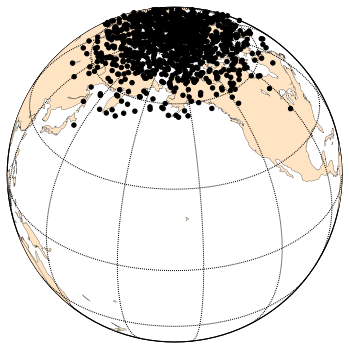

In [54]:
mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon=fishrot_lon[:1000],vgp_lat=fishrot_lat[:1000])
plt.show()

In [28]:
percentages_fish_TC2017 = []

for n in range(0,len(angle_TC2017)):
    angle_min = angle_TC2017[n]-9.7
    angles = []
    for n in range(len(fishrot_angle)):
        if fishrot_angle[n] > angle_min:
            angles.append(fishrot_angle[n])
    percent = len(angles)/len(fishrot_angle)*100
    percentages_fish_TC2017.append(percent)
    
percentages_fish_SH2017 = []

for n in range(0,len(angle_SH2017)):
    angle_min = angle_SH2017[n]-9.7
    angles = []
    for n in range(len(fishrot_angle)):
        if fishrot_angle[n] > angle_min:
            angles.append(fishrot_angle[n])
    percent = len(angles)/len(fishrot_angle)*100
    percentages_fish_SH2017.append(percent)
    
percentages_fish_T2012APWP = []

for n in range(0,len(angle_T2012)):
    angle_min = angle_T2012[n]-9.7
    angles = []
    for n in range(len(fishrot_angle)):
        if fishrot_angle[n] > angle_min:
            angles.append(fishrot_angle[n])
    percent = len(angles)/len(fishrot_angle)*100
    percentages_fish_T2012APWP.append(percent)

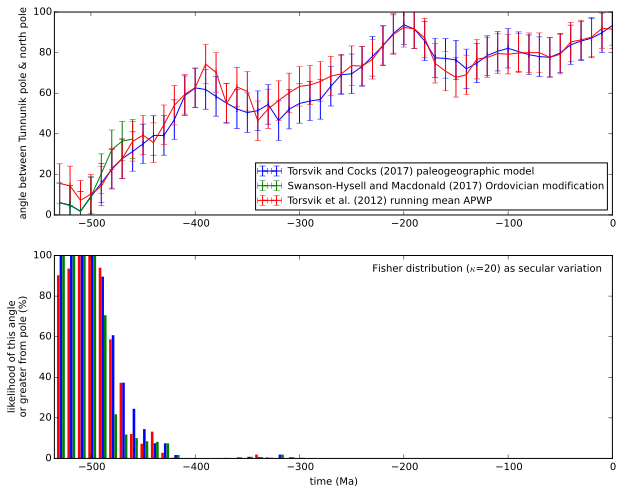

In [53]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.errorbar(time_T2012, angle_T2012, xerr=0, yerr=9.7,label='Torsvik et al. (2012) running mean APWP')
plt.ylim(0,100)
plt.xlim(-535,0)
plt.ylabel('angle between Tunnunik pole & north pole')
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of this angle \nor greater from pole (%)')
plt.xlabel('time (Ma)')


time_TC2017_shifted = []
shift = 2.5
for n in range(0,len(time_TC2017)):
    shifted_time = time_TC2017[n]
    time_TC2017_shifted.append(shifted_time)

time_SH2017_shifted = []
for n in range(0,len(time_SH2017)):
    shifted_time = time_SH2017[n] + shift
    time_SH2017_shifted.append(shifted_time)
    
time_T2012_shifted = []
for n in range(0,len(time_T2012)):
    shifted_time = time_T2012[n] - shift
    time_T2012_shifted.append(shifted_time)
    
plt.bar(time_TC2017_shifted,percentages_fish_TC2017,width=shift,color='b',align='edge',linewidth=0)
plt.bar(time_SH2017_shifted,percentages_fish_SH2017,width=shift,color='g',align='edge',linewidth=0)
plt.bar(time_T2012_shifted,percentages_fish_T2012APWP,width=shift,color='r',align='edge',linewidth=0)
plt.text(-10,92,'Fisher distribution ($\kappa$=20) as secular variation',horizontalalignment='right')
plt.xlim(-535,0)
plt.ylim(0,100)
plt.savefig('Tunnunik_VGP_analysis_Fisher.pdf')
plt.savefig('Tunnunik_VGP_analysis_Fisher.png')
plt.show()

### Secular variation represented by the TK03.GAD model



In [55]:
import random

def tk03_vgp_calc(N=10,lat=0,lon=0,dec=0,R=0,G2=0.,G3=0.,Imax = 0):
    """
    specify N, default is 100
    D specify mean Dec, default is 0
    LAT specify latitude, default is 0
    lon specify latitude, default is 0
    R include reversals (0 no reversals, 1 reversals)
    G2 FRAC  specify average g_2^0 fraction (default is 0)
    G3 FRAC  specify average g_3^0 fraction (default is 0)
    Imax  truncates  intensities to >Imax uT (default is 0)
    """
    vectors = []
    declinations = []
    inclinations = []
    tk03_vgp_lon = []
    tk03_vgp_lat = []
    for k in range(N):
        gh = pmag.mktk03(8, k, G2, G3)  # terms and random seed
        # get a random longitude, between 0 and 359
        #lon = random.randint(0, 360)
        vec = pmag.getvec(gh, lat, lon)  # send field model and lat to getvec
        if vec[2] >= Imax:
            vec[0] += dec
            if k % 2 == 0 and R == 1:
                vec[0] += 180.
                vec[1] = -vec[1]
            if vec[0] >= 360.:
                vec[0] -= 360.
        vectors.append(vec)
        declinations.append(vec[0])
        inclinations.append(vec[1])
        vgp = pmag.dia_vgp(vec[0],vec[1],0,lat,lon)
        tk03_vgp_lon.append(vgp[0])
        tk03_vgp_lat.append(vgp[1])
    return tk03_vgp_lon, tk03_vgp_lat

In [70]:
tk03_vgp_lon, tk03_vgp_lat = tk03_vgp_calc(N=10000)
TK03_angle = []
for n in range(0,len(tk03_vgp_lon)):
    vgp = (tk03_vgp_lon[n],tk03_vgp_lat[n])
    angle = pmag.angle(vgp,(0,90))
    TK03_angle.append(angle[0])

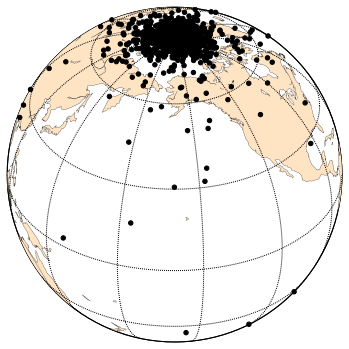

In [71]:
mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon=tk03_vgp_lon[:1000],vgp_lat=tk03_vgp_lat[:1000])
plt.show()

In [77]:
percentages_TK03_TC2017 = []

for n in range(0,len(angle_TC2017)):
    angle_min = angle_TC2017[n]-9.7
    angles = []
    for n in range(len(TK03_angle)):
        if TK03_angle[n] > angle_min:
            angles.append(TK03_angle[n])
    percent = len(angles)/len(TK03_angle)*100
    percentages_TK03_TC2017.append(percent)
    
percentages_TK03_SH2017 = []

for n in range(0,len(angle_SH2017)):
    angle_min = angle_SH2017[n]-9.7
    angles = []
    for n in range(len(TK03_angle)):
        if TK03_angle[n] > angle_min:
            angles.append(TK03_angle[n])
    percent = len(angles)/len(TK03_angle)*100
    percentages_TK03_SH2017.append(percent)
    
percentages_TK03_T2012APWP = []

for n in range(0,len(angle_T2012)):
    angle_min = angle_T2012[n]-9.7
    angles = []
    for n in range(len(TK03_angle)):
        if TK03_angle[n] > angle_min:
            angles.append(TK03_angle[n])
    percent = len(angles)/len(TK03_angle)*100
    percentages_TK03_T2012APWP.append(percent)

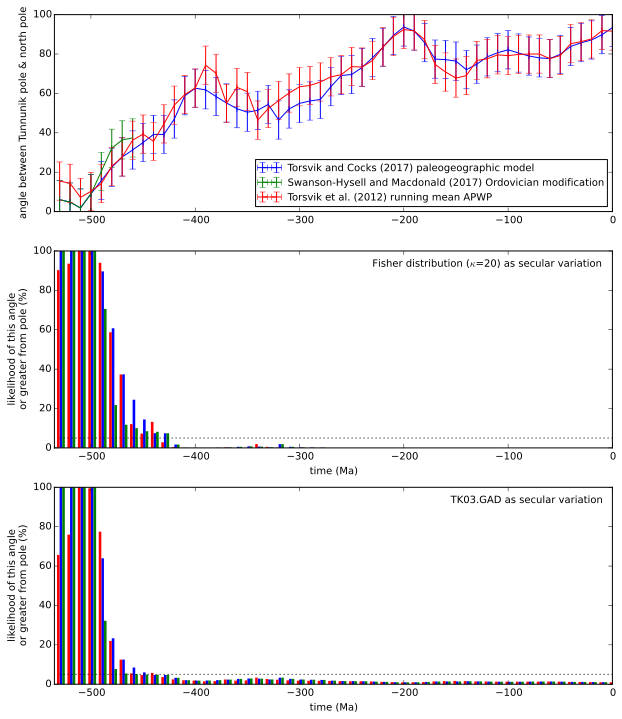

In [81]:
plt.figure(figsize=(10,12))
plt.subplot(311)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.errorbar(time_T2012, angle_T2012, xerr=0, yerr=9.7,label='Torsvik et al. (2012) running mean APWP')
plt.ylim(0,100)
plt.xlim(-535,0)
plt.ylabel('angle between Tunnunik pole & north pole')
plt.legend(loc=4,fontsize=10)

plt.subplot(312)
plt.ylabel('likelihood of this angle \nor greater from pole (%)')
plt.xlabel('time (Ma)')

time_TC2017_shifted = []
shift = 2.5
for n in range(0,len(time_TC2017)):
    shifted_time = time_TC2017[n]
    time_TC2017_shifted.append(shifted_time)

time_SH2017_shifted = []
for n in range(0,len(time_SH2017)):
    shifted_time = time_SH2017[n] + shift
    time_SH2017_shifted.append(shifted_time)
    
time_T2012_shifted = []
for n in range(0,len(time_T2012)):
    shifted_time = time_T2012[n] - shift
    time_T2012_shifted.append(shifted_time)
    
plt.bar(time_TC2017_shifted,percentages_fish_TC2017,width=shift,color='b',align='edge',linewidth=0)
plt.bar(time_SH2017_shifted,percentages_fish_SH2017,width=shift,color='g',align='edge',linewidth=0)
plt.bar(time_T2012_shifted,percentages_fish_T2012APWP,width=shift,color='r',align='edge',linewidth=0)
plt.text(-10,92,'Fisher distribution ($\kappa$=20) as secular variation',horizontalalignment='right')
plt.xlim(-535,0)
plt.ylim(0,100)
plt.hlines(5,-530,0,linestyles='dotted')

plt.subplot(313)
plt.ylabel('likelihood of this angle \nor greater from pole (%)')
plt.xlabel('time (Ma)')
    
plt.bar(time_TC2017_shifted,percentages_TK03_TC2017,width=shift,color='b',align='edge',linewidth=0)
plt.bar(time_SH2017_shifted,percentages_TK03_SH2017,width=shift,color='g',align='edge',linewidth=0)
plt.bar(time_T2012_shifted,percentages_TK03_T2012APWP,width=shift,color='r',align='edge',linewidth=0)
plt.text(-10,92,'TK03.GAD as secular variation',horizontalalignment='right')
plt.xlim(-535,0)
plt.ylim(0,100)
plt.hlines(5,-530,0,linestyles='dotted')

plt.savefig('Tunnunik_VGP_analysis.pdf')
plt.savefig('Tunnunik_VGP_analysis.png')
plt.show()

In [74]:


tk03_angle = []
for n in range(0,len(tk03_vgp_lon)):
    vgp = (tk03_vgp_lon[n],tk03_vgp_lat[n])
    angle = pmag.angle(vgp,(0,90))
    tk03_angle.append(angle[0])

percentages_TK03_TC2017 = []
for n in range(0,len(angle_TC2017)):
    angle_min = angle_TC2017[n]-9.7
    angle_max = angle_TC2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_TC2017.append(percent)
    
percentages_TK03_SH2017 = []
for n in range(0,len(angle_SH2017)):
    angle_min = angle_SH2017[n]-9.7
    angle_max = angle_SH2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_SH2017.append(percent)

Here is a visualization of 1000 draws from the TK03 model

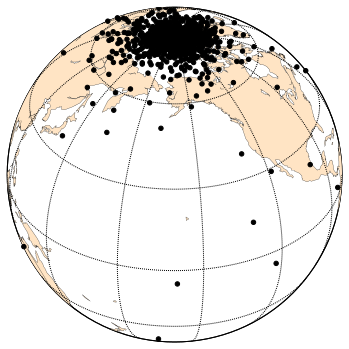

In [75]:
mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon=tk03_vgp_lon[:1000],vgp_lat=tk03_vgp_lat[:1000])

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.ylim(0,100)
plt.xlim(-505,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=10)
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of geomagnetic pole at this angle \n or closer to the geographic pole (%)',fontsize=10)
plt.xlabel('time (Ma)',fontsize=10)
plt.bar(time_TC2017,percentages_TK03_TC2017,width=5,color='b')
plt.bar(time_SH2017,percentages_TK03_SH2017,width=5,color='g')
plt.text(-10,92,'TK03 secular variation model',horizontalalignment='right')
plt.xlim(-505,0)
plt.ylim(0,100)
plt.show()

GPlates was used to calculate the position of the Tunnunik impact crater through time predicted by the Torsvik and Cocks (2017) paleogeographic model and the Swanson-Hysell and Macdonald (2017) modification of it. The location of the impact crater is: 72.46,-113.90


In [77]:
Tunnunik_location_SH2017 = pd.read_csv('Tunnunik_location_SH2017.csv')
Tunnunik_location_TC2017 = pd.read_csv('Tunnunik_location_TC2017.csv')
Tunnunik_location_TC2017.head()

Time (Ma)      Lat       Lon  V mag (cm/yr)  V azimuth  V colat (cm/yr)  \
0        500   4.6487 -133.0109        10.3424   298.6114          -4.9526   
1        490   8.7035 -141.4265         4.8235    39.9128          -3.6997   
2        480  12.1660 -138.7811         3.7313   298.2675          -1.7671   
3        470  13.6177 -141.8797         9.0167   273.5636          -0.5604   
4        460  13.8478 -150.2147         1.0184   118.6777           0.4887   

   V lon (cm/yr)   Ang V  
0        -9.0794  1.0353  
1         3.0948  0.7764  
2        -3.2864  0.5624  
3        -8.9992 -0.8318  
4         0.8935  0.4556

In [ ]:
percentages_TK03_TC2017_new = []

for n in range(0,8):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=10000,lat=Tunnunik_location_TC2017.Lat[n],lon=Tunnunik_location_TC2017.Lon[n])

    tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_TC2017[n]-9.7
    angle_max = angle_TC2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_TC2017_new.append(percent)
    
percentages_TK03_SH2017_new = []

for n in range(0,len(Tunnunik_location_SH2017)):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=10000,lat=Tunnunik_location_SH2017.Lat[n],lon=Tunnunik_location_SH2017.Lon[n])

    tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_SH2017[n]-9.7
    angle_max = angle_SH2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_SH2017_new.append(percent)

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


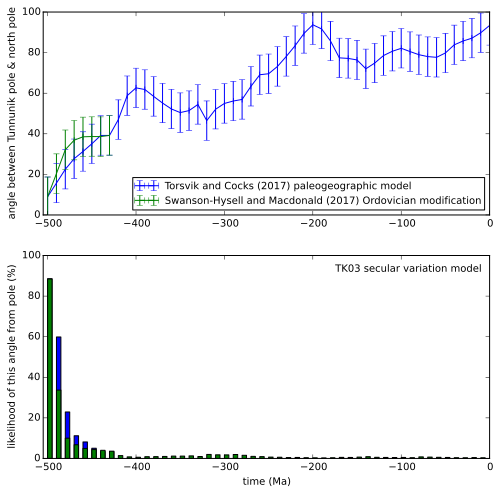

In [111]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.ylim(0,100)
plt.xlim(-505,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=10)
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of this angle from pole (%)',fontsize=10)
plt.xlabel('time (Ma)',fontsize=10)
plt.bar(time_TC2017[0:8],percentages_TK03_TC2017_new[0:8],width=5,color='b')
plt.bar(time_SH2017,percentages_TK03_SH2017_new,width=5,color='g')
plt.text(-10,92,'TK03 secular variation model',horizontalalignment='right')
plt.xlim(-505,0)
plt.ylim(0,100)
plt.savefig('Tunnunik_VGP_analysis_TK03.pdf')
plt.savefig('Tunnunik_VGP_analysis_TK03.png')
plt.show()

In [135]:
time_TC2017[3]
angle_TC2017[3]+9.7
percentages_TK03_TC2017_new[3]

11.17

In [30]:
pmag.dotilt?

Signature: pmag.dotilt(dec, inc, bed_az, bed_dip)
Docstring:
Does a tilt correction on a direction (dec,inc) using bedding dip direction
and bedding dip.

Parameters
----------
dec : declination directions in degrees
inc : inclination direction in degrees
bed_az : bedding dip direction
bed_dip : bedding dip

Returns
-------
dec,inc : a tuple of rotated dec, inc values

Examples
-------
>>> pmag.dotilt(91.2,43.1,90.0,20.0)
(90.952568837153436, 23.103411670066617)
File:      ~/PmagPy/pmagpy/pmag.py
Type:      function


In [70]:
tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=100000,lat=Tunnunik_location_TC2017.Lat[n],lon=Tunnunik_location_TC2017.Lon[n])
within_A95 = []
for x in range(0,len(tk03_vgp_lon)):
    if tk03_vgp_lat[x] > (90 - 9.7):
        within_A95.append(tk03_vgp_lat[x])
length_for_normalization = len(within_A95)
length_for_normalization

57292

In [77]:
percentages_TK03_TC2017_A95 = []
percentages_TK03_TC2017_A95_normalized = []

for n in range(0,8):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=100000,lat=Tunnunik_location_TC2017.Lat[n],lon=Tunnunik_location_TC2017.Lon[n])
    
    tk03_vgp_lon_rot = []
    tk03_vgp_lat_rot = []
    within_A95 = []
    for x in range(0,len(tk03_vgp_lon)):
        rotated = pmag.dotilt(tk03_vgp_lon[x],tk03_vgp_lat[x],
                              Tunnunik_pole_TC2017['Lon'][n],90+Tunnunik_pole_TC2017['Lat'][n])
        tk03_vgp_lon_rot.append(rotated[0])
        tk03_vgp_lat_rot.append(rotated[1])
        if tk03_vgp_lat_rot[x] > (90 -9.7):
            within_A95.append(rotated[1])
    percent = len(within_A95)/len(tk03_vgp_lon)*100
    percent_normalize = len(within_A95)/length_for_normalization*100
    percentages_TK03_TC2017_A95.append(percent)
    percentages_TK03_TC2017_A95_normalized.append(percent_normalize)

percentages_TK03_SH2017_A95 = []
percentages_TK03_SH2017_A95_normalized = []

for n in range(0,len(Tunnunik_location_SH2017)):
    print(n)
    tk03_vgp_lon, tk03_vgp_lat  = tk03_vgp_calc(N=100000,lat=Tunnunik_location_SH2017.Lat[n],lon=Tunnunik_location_SH2017.Lon[n])
    
    tk03_vgp_lon_rot = []
    tk03_vgp_lat_rot = []
    within_A95 = []
    for x in range(0,len(tk03_vgp_lon)):
        rotated = pmag.dotilt(tk03_vgp_lon[x],tk03_vgp_lat[x],
                              Tunnunik_pole_SH2017['Lon'][n],90+Tunnunik_pole_SH2017['Lat'][n])
        tk03_vgp_lon_rot.append(rotated[0])
        tk03_vgp_lat_rot.append(rotated[1])
        if tk03_vgp_lat_rot[x] > (90 -9.7):
            within_A95.append(rotated[1])
    percent = len(within_A95)/len(tk03_vgp_lon)*100
    percent_normalize = len(within_A95)/length_for_normalization*100
    percentages_TK03_SH2017_A95.append(percent)
    percentages_TK03_SH2017_A95_normalized.append(percent_normalize)
             
percentages_TK03_TC2017_A95

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


[36.083999999999996,
 10.999,
 3.225,
 1.4569999999999999,
 0.845,
 0.5479999999999999,
 0.269,
 0.348]

In [78]:
percentages_TK03_SH2017_A95_normalized

[62.88661593241639,
 8.425260071214131,
 1.7367171681910214,
 1.0367939677441877,
 0.9023947497032744,
 0.769740976052503,
 0.7051595336172589,
 0.562033093625637,
 0.2024715492564407,
 0.10298121901836207,
 0.07854499755637785,
 0.07156321999581093,
 0.08378133072680305,
 0.08901766389722823,
 0.12567199609020457,
 0.12392655170006284,
 0.1343992180409132,
 0.12567199609020457,
 0.265307547301543,
 0.2548348809606926,
 0.19898066047615723,
 0.1902534385254486,
 0.1501082175521888,
 0.1396355512113384,
 0.09425399706765342,
 0.06283599804510229,
 0.06458144243524401,
 0.04712699853382671,
 0.03839977658311806,
 0.02618166585212595,
 0.01919988829155903,
 0.00872722195070865,
 0.040145220973259794,
 0.05410877609439363,
 0.04363610975354325,
 0.03839977658311806,
 0.04712699853382671,
 0.048872442923968445,
 0.04363610975354325,
 0.036654332192976334,
 0.040145220973259794,
 0.04363610975354325,
 0.04363610975354325,
 0.0523633317042519,
 0.055854220484535366,
 0.041890665363401525,
 0.

Should perhaps normalize it by the likelihood of a VGP within same confidence interval centered on the pole.

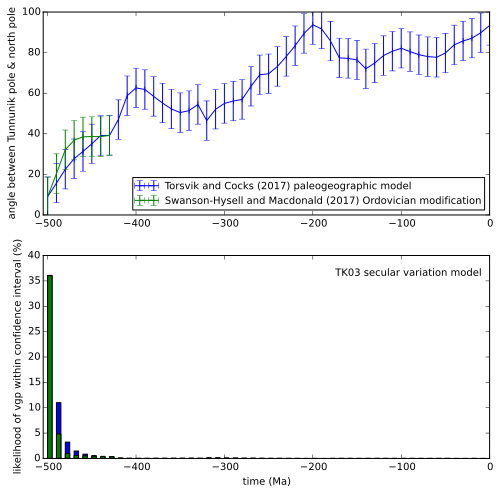

In [79]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.ylim(0,100)
plt.xlim(-505,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=10)
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of vgp within confidence interval (%)',fontsize=10)
plt.xlabel('time (Ma)',fontsize=10)
plt.bar(time_TC2017[0:8],percentages_TK03_TC2017_A95[0:8],width=5,color='b')
plt.bar(time_SH2017,percentages_TK03_SH2017_A95,width=5,color='g')
plt.text(-10,36,'TK03 secular variation model',horizontalalignment='right')
plt.xlim(-505,0)
#plt.ylim(0,100)
plt.savefig('Tunnunik_VGP_analysis_TK03_A95.pdf')
plt.savefig('Tunnunik_VGP_analysis_TK03_A95.png')
plt.show()

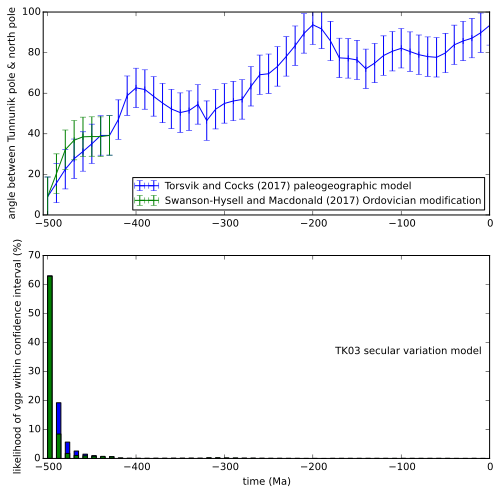

In [80]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.errorbar(time_TC2017, angle_TC2017, xerr=0, yerr=9.7,label='Torsvik and Cocks (2017) paleogeographic model')
plt.errorbar(time_SH2017[0:8], angle_SH2017[0:8], xerr=0, yerr=9.7,label='Swanson-Hysell and Macdonald (2017) Ordovician modification')
plt.ylim(0,100)
plt.xlim(-505,0)
plt.ylabel('angle between Tunnunik pole & north pole',fontsize=10)
plt.legend(loc=4,fontsize=10)
plt.subplot(212)
plt.ylabel('likelihood of vgp within confidence interval (%)',fontsize=10)
plt.xlabel('time (Ma)',fontsize=10)
plt.bar(time_TC2017[0:8],percentages_TK03_TC2017_A95_normalized[0:8],width=5,color='b')
plt.bar(time_SH2017,percentages_TK03_SH2017_A95_normalized,width=5,color='g')
plt.text(-10,36,'TK03 secular variation model',horizontalalignment='right')
plt.xlim(-505,0)
#plt.ylim(0,100)
plt.savefig('Tunnunik_VGP_analysis_TK03_A95.pdf')
plt.savefig('Tunnunik_VGP_analysis_TK03_A95.png')
plt.show()

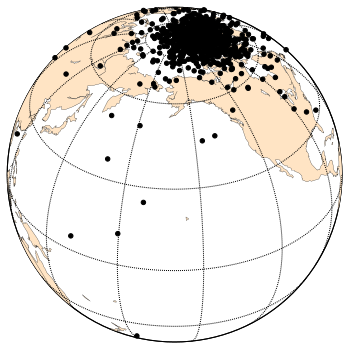

In [46]:
mapname = Basemap(projection='ortho',lat_0=35,lon_0=200)
plt.figure(figsize=(6, 6))
mapname.drawcoastlines(linewidth=0.25)
mapname.fillcontinents(color='bisque',lake_color='white',zorder=1)
mapname.drawmapboundary(fill_color='white')
mapname.drawmeridians(np.arange(0,360,30))
mapname.drawparallels(np.arange(-90,90,30))
ipmag.plot_vgp(mapname,vgp_lon=tk03_vgp_lon_rot[:1000],vgp_lat=tk03_vgp_lat_rot[:1000])

In [42]:
pmag.dotilt(Tunnunik_pole_SH2017['Lon'][0]+180,-Tunnunik_pole_SH2017['Lat'][0],
            Tunnunik_pole_SH2017['Lon'][0],90+Tunnunik_pole_SH2017['Lat'][0])

120.96375653207352

In [ ]:
tk03_angle = []
    for v in range(0,len(tk03_vgp_lon)):
        vgp = (tk03_vgp_lon[v],tk03_vgp_lat[v])
        angle = pmag.angle(vgp,(0,90))
        tk03_angle.append(angle[0])
    
    angle_min = angle_TC2017[n]-9.7
    angle_max = angle_TC2017[n]+9.7
    angles = []
    for n in range(len(tk03_angle)):
        if angle_min > 0:
            if tk03_angle[n] > angle_min and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
        if angle_min < 0 :
            if tk03_angle[n] > 0 and tk03_angle[n] < angle_max:
                angles.append(tk03_angle[n])
            if tk03_angle[n] > 0 and tk03_angle[n] < np.abs(angle_min):
                angles.append(tk03_angle[n])
    percent = len(angles)/len(tk03_angle)*100
    percentages_TK03_TC2017_new.append(percent)

Fossil information in Dewing et al. 2013:

"It is overlain by thin- to medium- bedded dolowackestone with crinoids, gastropods, stromatoporoids, and silicified solitary rugose corals and tabulate corals belonging to Catenipora and Favosites. These strata are assigned to the Thumb Mountain Formation."